In [1]:
import pmagpy.ipmag as ipmag
import pmagpy.pmag as pmag
import os
import fnmatch
import itertools

In [2]:
import numpy as np
import time
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
from datetime import datetime as dt
import sys
import math
from functools import reduce
# makes the plots come up in window
%matplotlib inline
%config InlineBackend.figure_formats = {'svg',}

from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
#from mpl_toolkits.basemap import Basemap

In [3]:



from datetime import datetime as dt



In [4]:
def plot_net(fignum=None):
    """
    Draws circle and tick marks for equal area projection.
    """

    if fignum != None:
        plt.figure(num=fignum,)
    plt.axis("off")
    Dcirc = np.arange(0, 361.)
    Icirc = np.zeros(361, 'f')
    Xcirc, Ycirc = [], []
    for k in range(361):
        XY = pmag.dimap(Dcirc[k], Icirc[k])
        Xcirc.append(XY[0])
        Ycirc.append(XY[1])
    plt.plot(Xcirc, Ycirc, 'k')
    
    for d in range(9):
        Dcirc = np.arange(0, 361.)
        Icirc = np.full(361,10*d, 'f')
        Xcirc, Ycirc = [], []
        for k in range(361):
            XY = pmag.dimap(Dcirc[k], Icirc[k])
            Xcirc.append(XY[0])
            Ycirc.append(XY[1])
        plt.plot(Xcirc, Ycirc, 'k',linewidth=0.25)
    
# put on the tick marks
    Xsym, Ysym = [], []
    for I in range(0,90,10):
        XY = pmag.dimap(0., I)
        Xsym.append(XY[0])
        Ysym.append(XY[1])
    plt.plot(Xsym, Ysym, 'k_',linewidth=0.5)
    Xsym, Ysym = [], []
    for I in range(2, 90):
        XY = pmag.dimap(0., I)
        Xsym.append(XY[0])
        Ysym.append(XY[1])
    plt.plot(Xsym,Ysym, 'k', linewidth=0.25)
    Xsym, Ysym = [], []
    for I in range(0,90,10):
        XY = pmag.dimap(90., I)
        Xsym.append(XY[0])
        Ysym.append(XY[1])
    plt.plot(Xsym, Ysym, 'k|',linewidth=0.1)
    Xsym, Ysym = [], []
    for I in range(2, 90):
        XY = pmag.dimap(90., I)
        Xsym.append(XY[0])
        Ysym.append(XY[1])
    plt.plot(Xsym,Ysym, 'k', linewidth=0.25)
    #the south axis
    Xsym, Ysym = [], []
    for I in range(0, 90, 10):
        XY = pmag.dimap(180., I)
        Xsym.append(XY[0])
        Ysym.append(XY[1])
    plt.plot(Xsym, Ysym, 'k_',linewidth=0.5)
    Xsym, Ysym = [], []
    for I in range(2, 90):
        XY = pmag.dimap(180., I)
        Xsym.append(XY[0])
        Ysym.append(XY[1])
    plt.plot(Xsym,Ysym, 'k', linewidth=0.25)
    #the west axis
    Xsym, Ysym = [], []
    for I in range(0, 90, 10):
        XY = pmag.dimap(270., I)
        Xsym.append(XY[0])
        Ysym.append(XY[1])
    plt.plot(Xsym, Ysym, 'k|',linewidth=0.5)
    Xsym, Ysym = [], []
    for I in range(2, 90):
        XY = pmag.dimap(270., I)
        Xsym.append(XY[0])
        Ysym.append(XY[1])
    plt.plot(Xsym,Ysym, 'k', linewidth=0.25)
    #declination ticks
    for D in range(0, 360, 15):
        Xtick, Ytick = [], []
        for I in range(85):
            XY = pmag.dimap(D, I)
            Xtick.append(XY[0])
            Ytick.append(XY[1])
        plt.plot(Xtick, Ytick, 'k',linewidth=0.5)
    plt.axis("equal")
    plt.axis((-1.05, 1.05, -1.05, 1.05))

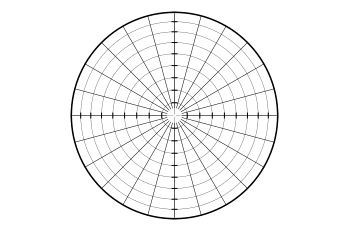

In [5]:
plot_net()

In [6]:
# read in data
data_acb_all = pd.read_excel('ACB_Data.xlsx')
# convert to data frames
data_acb_all = pd.DataFrame(data_acb_all, columns=['Site','Lat','Lon','n','Dec','Inc','k','alpha'])
data_acb_all

,Site,Lat,Lon,n,Dec,Inc,k,alpha
0,S201,41.452809,-122.080055,6,5.9,62.8,424,3.3
1,S202,41.440316,-122.068828,9,17.4,66.5,234,3.7
2,S203,41.430551,-122.053189,6,15.9,47.5,22,16.4
3,S204,41.466153,-122.072430,6,107.0,25.2,49,9.7
4,S205,41.458664,-122.030297,10,5.5,59.6,672,1.9
5,S206,41.455670,-122.045550,8,-0.4,59.2,134,4.8
6,S207,41.456920,-122.046900,8,8.2,59.2,311,3.1
7,S208,41.457578,-122.046669,8,5.1,57.9,266,3.4
8,S209,41.453990,-122.048700,4,11.8,62.1,1378,2.5
9,S2010,41.443015,-122.035975,7,10.9,59.1,91,5.9


In [7]:
#the total path between all eleven sites!
#angle between S206 and S207
uno = pmag.angle([359.6,59.2],[8.2,59.2])
#angle between S207 and S208
dos = pmag.angle([8.2,59.2],[5.1,57.9])
#angle between S208 and S205
tres = pmag.angle([5.1,57.9],[5.5,59.6])
#angle between S205 and S2010
quattro = pmag.angle([5.5,59.6],[10.9,59.1])
#angle between S2010 and S2011
cinque = pmag.angle([10.9,59.1],[9.5,61.6])
#angle between S2011 and S2012
sechs = pmag.angle([9.5,61.6],[10.2,56.1])
#angle between S2012 and S2013
sieben = pmag.angle([10.2,56.1],[6.9,56])
#angle between S2013 and S2014
acht = pmag.angle([6.9,56],[4.5,63.1])
#angle between S2014 and S201
neun = pmag.angle([4.5,63.1],[5.9,62.8])
#angle between S201 and S202
zehn = pmag.angle([5.9,62.8],[17.4,66.5])
#angle between S202 and S209
elf = pmag.angle([17.4,66.5],[11.8,62.1])

In [8]:
#angle between S206 and dip
uno = pmag.angle([359.6,59.2],[0,60.4])
#angle between S207 and dip
dos = pmag.angle([8.2,59.2],[0,60.4])
#angle between S208 and dip
tres = pmag.angle([5.1,57.9],[0,60.4])
#angle between S205 and dip
quattro = pmag.angle([5.5,59.6],[0,60.4])
#angle between S2010 and dip
cinque = pmag.angle([10.9,59.1],[0,60.4])
#angle between S2011 and dip
sechs = pmag.angle([9.5,61.6],[0,60.4])
#angle between S2012 and dip
sieben = pmag.angle([10.2,56.1],[0,60.4])
#angle between S2013 and dip
acht = pmag.angle([6.9,56],[0,60.4])
#angle between S2014 and dip
neun = pmag.angle([4.5,63.1],[0,60.4])
#angle between S201 and dip
zehn = pmag.angle([5.9,62.8],[0,60.4])
#angle between S202 and dip
elf = pmag.angle([17.4,66.5],[0,60.4])
#angle between S202 and S209
zwolf = pmag.angle([11.8,62.1],[0,60.4])

In [9]:
zwolf

array([5.9152196])

In [10]:
S201 = data_acb_all[data_acb_all.Site == 'S201']
S202 = data_acb_all[data_acb_all.Site == 'S202']
S201.reset_index(inplace=True,drop=True)
S202.reset_index(inplace=True,drop=True)

In [11]:
S201.Dec[0]

5.9

In [12]:
pmag.angle([S201.Dec[0],S201.Inc[0]],[S202.Dec[0],S202.Inc[0]])

array([6.14373183])

In [13]:
acb_angles = []
loop = np.zeros(14)


for n in range(len(loop)-1):
    angle_twixt = pmag.angle([data_acb_all.Dec[0],data_acb_all.Inc[0]],[data_acb_all.Dec[n+1],data_acb_all.Inc[n+1]])
    acb_angles.append(angle_twixt)

print(acb_angles)

[array([6.14373183]), array([16.28762541]), array([72.5983043]), array([3.20578044]), array([4.71683542]), array([3.76813374]), array([4.91585644]), array([2.81611711]), array([4.42263448]), array([2.0632676]), array([7.04365154]), array([6.81881237]), array([0.70379508])]


In [38]:
#the k of B+C 1981 for S201
sf = 0.5
sw = np.rad2deg(np.sqrt(2)/np.sqrt(S201['k']))
st = 3

s_bc1981_s201 = np.sqrt(sf**2+sw**2+st**2)
k_bc1981_s201 = 2/(np.deg2rad(s_bc1981_s201)**2)
print(k_bc1981_s201)

0    265.438843
Name: k, dtype: float64


In [39]:
#the k of B+C 1981 for S202
sf = 0.5
sw = np.rad2deg(np.sqrt(2)/np.sqrt(234))
st = 3

s_bc1981_s202 = np.sqrt(sf**2+sw**2+st**2)
k_bc1981_s202 = 2/(np.deg2rad(s_bc1981_s202)**2)
print(k_bc1981_s202)

175.98322319497234


In [40]:
#the k of B+C 1981 for S205
sf = 0.5
sw = np.rad2deg(np.sqrt(2)/np.sqrt(672))
st = 1.5

s_bc1981_s205 = np.sqrt(sf**2+sw**2+st**2)
k_bc1981_s205 = 2/(np.deg2rad(s_bc1981_s205)**2)
print(k_bc1981_s205)

535.083552299663


In [41]:
#the k of B+C 1981 for S206
sf = 0.5
sw = np.rad2deg(np.sqrt(2)/np.sqrt(134))
st = 1.5

s_bc1981_s206 = np.sqrt(sf**2+sw**2+st**2)
k_bc1981_s206 = 2/(np.deg2rad(s_bc1981_s206)**2)
print(k_bc1981_s206)

127.49478054320484


In [42]:
#the k of B+C 1981 for S207
sf = 1.0
sw = np.rad2deg(np.sqrt(2)/np.sqrt(311))
st = 1.5

s_bc1981_s207 = np.sqrt(sf**2+sw**2+st**2)
k_bc1981_s207 = 2/(np.deg2rad(s_bc1981_s207)**2)
print(k_bc1981_s207)

269.5100050715595


In [43]:
#the k of B+C 1981 for S208
sf = 1.0
sw = np.rad2deg(np.sqrt(2)/np.sqrt(266))
st = 1.5

s_bc1981_s208 = np.sqrt(sf**2+sw**2+st**2)
k_bc1981_s208 = 2/(np.deg2rad(s_bc1981_s208)**2)
print(k_bc1981_s208)

235.05067133109927


In [44]:
#the k of B+C 1981 for S209
sf = 1.0
sw = np.rad2deg(np.sqrt(2)/np.sqrt(1378))
st = 2.0

s_bc1981_s209 = np.sqrt(sf**2+sw**2+st**2)
k_bc1981_s209 = 2/(np.deg2rad(s_bc1981_s209)**2)
print(k_bc1981_s209)

672.3896192862752


In [45]:
#the k of B+C 1981 for S2010
sf = 1.0
sw = np.rad2deg(np.sqrt(2)/np.sqrt(91))
st = 1.5

s_bc1981_s2010 = np.sqrt(sf**2+sw**2+st**2)
k_bc1981_s2010 = 2/(np.deg2rad(s_bc1981_s2010)**2)
print(k_bc1981_s2010)

87.07756488373538


In [46]:
#the k of B+C 1981 for S2011
sf = 1.0
sw = np.rad2deg(np.sqrt(2)/np.sqrt(642))
st = 1.5

s_bc1981_s2011 = np.sqrt(sf**2+sw**2+st**2)
k_bc1981_s2011 = 2/(np.deg2rad(s_bc1981_s2011)**2)
print(k_bc1981_s2011)

487.1785076728874


In [47]:
#the k of B+C 1981 for S2012
sf = 0.5
sw = np.rad2deg(np.sqrt(2)/np.sqrt(122))
st = 3.0

s_bc1981_s2012 = np.sqrt(sf**2+sw**2+st**2)
k_bc1981_s2012 = 2/(np.deg2rad(s_bc1981_s2012)**2)
print(k_bc1981_s2012)

104.10618880074634


In [48]:
#the k of B+C 1981 for S2013
sf = 0.5
sw = np.rad2deg(np.sqrt(2)/np.sqrt(4658))
st = 3

s_bc1981_s2013 = np.sqrt(sf**2+sw**2+st**2)
k_bc1981_s2013 = 2/(np.deg2rad(s_bc1981_s2013)**2)
print(k_bc1981_s2013)

615.9380194247998


In [49]:
#the k of B+C 1981 for S2014
sf = 0.5
sw = np.rad2deg(np.sqrt(2)/np.sqrt(4835))
st = 3

s_bc1981_s2014 = np.sqrt(sf**2+sw**2+st**2)
k_bc1981_s2014 = 2/(np.deg2rad(s_bc1981_s2014)**2)
print(k_bc1981_s2014)

618.9341363096919


In [ ]:
def prob_simul():
    """
    runs the Bogue + Coe (1980) algorithm for probabilistic correlation
    """
trials=10000

ans='y'

while ans in ['y','Y','']:
    print()
    alpha=eval(input('Enter angle between vgps: '))
    k1=eval(input('Enter k for vgp1 '))
    k2=eval(input('Enter k for vgp2 '))

    print()
    hit=0
    miss=0

    for i in range(trials):
        #FakeFish returns a list of [dec,inc]s, in this case just 1.
        lontp1,lattp1 = ipmag.fishrot(k1,1,0,90,di_block=False)
        lontp2,lattp2 = ipmag.fishrot(k2,1,0,90,di_block=False)
        angle=pmag.angle([lontp1[0],lattp1[0]],[lontp2[0],lattp2[0]])
        if (angle>=alpha):
            hit=hit+1
        else:
            miss=miss+1

    p1=1.0*hit/trials

    print ('Simul prob: {0:5.3f}'.format(p1))
    print()
    ans=input('More? ')

In [51]:
x=data_acb_all['Site']

In [52]:
acb_pairwise = list(itertools.combinations(x, 2))
len(acb_pairwise)

91

In [15]:
data_acb = data_acb_all.query('Inc > 50')
data_acb.reset_index(inplace=True, drop=True)

In [16]:
ipmag.fisher_mean(dec=data_acb.Dec,inc=data_acb.Inc)

{'dec': 7.796108294860757,
 'inc': 60.33049527300707,
 'n': 12,
 'r': 11.976541677861247,
 'k': 468.9167424224336,
 'alpha95': 2.0064911568976243,
 'csd': 3.740564511994958}

{'Mode': 'Mode 1',
 'Dec': 7.79246573749117,
 'Inc': 60.32772828697197,
 'N': 12,
 'Mu': -0.061320323032074575,
 'Mu_critical': 1.207,
 'Me': 0.6043760569964902,
 'Me_critical': 1.094,
 'Test_result': 'consistent with Fisherian model'}

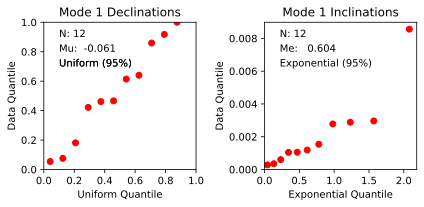

In [17]:
ipmag.fishqq(data_acb.Dec, data_acb.Inc)

In [56]:
#just for the distal (i.e. late) flows
distal_flows = ipmag.make_di_block(dec=[5.9,17.4,10.2,11.8,6.9,4.5],inc=[62.8,66.5,56.1,62.1,56,63.1])
distal_mean = ipmag.fisher_mean(di_block=distal_flows)
print(distal_mean)

{'dec': 9.239872034583962, 'inc': 61.16254097776119, 'n': 6, 'r': 5.983036689037233, 'k': 294.7537783734863, 'alpha95': 3.909062614620177, 'csd': 4.717971666441318}


In [57]:
#the 'interior' flows now
interior_flows = ipmag.make_di_block(dec=[5.5,359.6,8.2,5.1,10.9,9.5],inc=[59.6,59.2,59.2,57.9,59.1,61.6])
interior_mean = ipmag.fisher_mean(di_block=interior_flows)
print(interior_mean)

{'dec': 6.427561910930107, 'inc': 59.48538398087332, 'n': 6, 'r': 5.995671385037083, 'k': 1155.1038941635031, 'alpha95': 1.9722906846379928, 'csd': 2.3832768522225605}


In [58]:
pmag.angle([distal_mean['dec'],distal_mean['inc']],[interior_mean['dec'],interior_mean['inc']])

array([2.17940713])

In [19]:
ipmag.common_mean_watson(distal_flows,interior_flows)


TypeError: can't multiply sequence by non-int of type 'float'

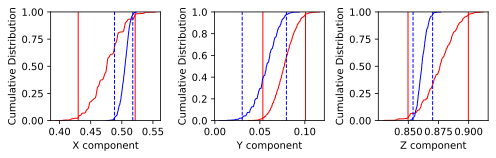

In [60]:
ipmag.common_mean_bootstrap(distal_flows,interior_flows,save=True)

In [61]:
pmag.angle([6.4,59.5],[9.2,61.2])

array([2.19247337])

Results of Watson V test: 

Watson's V:           2.0
Critical value of V:  7.1
"Pass": Since V is less than Vcrit, the null hypothesis
that the two populations are drawn from distributions
that share a common mean direction can not be rejected.

M&M1990 classification:

Angle between data set means: 2.2
Critical angle for M&M1990:   4.1
The McFadden and McElhinny (1990) classification for
this test is: 'A'


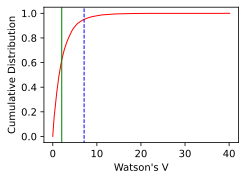

(1, 2.179407125227375, 4.074356226144492)

In [62]:
ipmag.common_mean_watson(distal_flows,interior_flows,plot='yes',save=True)


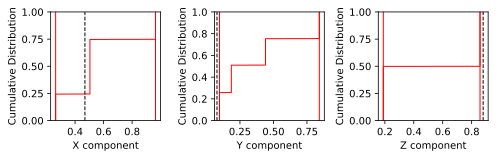

In [63]:
ipmag.common_mean_bootstrap([10.9,59.1],[9.5,61.6])

In [64]:
int_synth = ipmag.fishrot(k=1155, n=10000, dec=6.4, inc=59.5)
ext_synth = ipmag.fishrot(k=294, n=10000, dec=9.2, inc=61.2)

In [65]:
indices = [0,1]
in_out =[]
loop = np.zeros(10000)


for n in range(len(loop)):
    int_draw = np.take(int_synth[np.random.randint(10000)],indices)
    ext_draw = np.take(ext_synth[np.random.randint(10000)],indices)
    angle_twixt = pmag.angle(int_draw,ext_draw)

    in_out.append(angle_twixt)

In [66]:
np.average(in_out)

5.0529673454413055

In [67]:
np.std(in_out)

2.59433346495599

In [68]:
S206_synth = ipmag.fishrot(k=134, n=10000, dec=359.6, inc=59.2)
S207_synth = ipmag.fishrot(k=311, n=10000, dec=8.2, inc=59.2)
S208_synth = ipmag.fishrot(k=266, n=10000, dec=5.1, inc=57.9)
S205_synth = ipmag.fishrot(k=672, n=10000, dec=5.5, inc=59.6)
S2010_synth = ipmag.fishrot(k=91, n=10000, dec=10.9, inc=59.1)
S2011_synth = ipmag.fishrot(k=642, n=10000, dec=9.5, inc=61.6)
S2012_synth = ipmag.fishrot(k=122, n=10000, dec=10.2, inc=56.1)
S2013_synth = ipmag.fishrot(k=4658, n=10000, dec=6.9, inc=56)
S2014_synth = ipmag.fishrot(k=4385, n=10000, dec=4.5, inc=63.1)
S201_synth = ipmag.fishrot(k=424, n=10000, dec=5.9, inc=62.8)
S202_synth = ipmag.fishrot(k=234, n=10000, dec=17.4, inc=66.5)
S209_synth = ipmag.fishrot(k=1378, n=10000, dec=11.8, inc=62.1)

In [69]:
indices = [0,1]
path_lengths =[]
loop = np.zeros(10000)


for n in range(len(loop)):
    S206_draw = np.take(S206_synth[np.random.randint(10000)],indices)
    S207_draw = np.take(S207_synth[np.random.randint(10000)],indices)
    S208_draw = np.take(S208_synth[np.random.randint(10000)],indices)
    S205_draw = np.take(S205_synth[np.random.randint(10000)],indices)
    S2010_draw = np.take(S2010_synth[np.random.randint(10000)],indices)
    S2011_draw = np.take(S2011_synth[np.random.randint(10000)],indices)
    S2012_draw = np.take(S2012_synth[np.random.randint(10000)],indices)
    S2013_draw = np.take(S2013_synth[np.random.randint(10000)],indices)
    S2014_draw = np.take(S2014_synth[np.random.randint(10000)],indices)
    S201_draw = np.take(S201_synth[np.random.randint(10000)],indices)
    S202_draw = np.take(S202_synth[np.random.randint(10000)],indices)
    S209_draw = np.take(S209_synth[np.random.randint(10000)],indices)
    sec_var_total = pmag.angle(S206_draw,S207_draw)+pmag.angle(S207_draw,S208_draw)+pmag.angle(S208_draw,S205_draw)+pmag.angle(S205_draw,S2010_draw)+pmag.angle(S2010_draw,S2011_draw)+pmag.angle(S2011_draw,S2012_draw)+pmag.angle(S2012_draw,S2013_draw)+pmag.angle(S2013_draw,S2014_draw)+pmag.angle(S2014_draw,S201_draw)+pmag.angle(S201_draw,S202_draw)+pmag.angle(S202_draw,S209_draw)
    
    path_lengths.append(sec_var_total)


In [70]:
np.average(path_lengths)

78.45916310997575

In [71]:
np.std(path_lengths)

14.71541082747742

In [72]:
smol_paths = list(filter(lambda x: (x < 40), path_lengths))
len(smol_paths)

8

In [73]:
np.min(path_lengths)

34.906558995610865

In [74]:
ridge_wander = pmag.angle([359.6,59.2],[8.2,59.2]) + pmag.angle([8.2,59.2],[5.1,57.9])

#angular difference from 1900 to 2000 using cals10k
pmag.angle([23.0,72.4],[17.8,71.2])
#angular difference using igrf is the same, probably because the model is constrained to do so...


array([2.0182743])

In [75]:
pmag.angle([8.49,61.87],[6.43,59.49])

array([2.58464021])

In [76]:
pmag.angle([8.49,61.87],[0,60.44])

array([4.334573])

In [77]:
#the total path between all eleven sites!
#angle between S206 and S207
uno = pmag.angle([359.6,59.2],[8.2,59.2])
#angle between S207 and S208
dos = pmag.angle([8.2,59.2],[5.1,57.9])
#angle between S208 and S205
tres = pmag.angle([5.1,57.9],[5.5,59.6])
#angle between S205 and S2010
quattro = pmag.angle([5.5,59.6],[10.9,59.1])
#angle between S2010 and S2011
cinque = pmag.angle([10.9,59.1],[9.5,61.6])
#angle between S2011 and S2012
sechs = pmag.angle([9.5,61.6],[10.2,56.1])
#angle between S2012 and S2013
sieben = pmag.angle([10.2,56.1],[6.9,56])
#angle between S2013 and S2014
acht = pmag.angle([6.9,56],[4.5,63.1])
#angle between S2014 and S201
neun = pmag.angle([4.5,63.1],[5.9,62.8])
#angle between S201 and S202
zehn = pmag.angle([5.9,62.8],[17.4,66.5])
#angle between S202 and S209
elf = pmag.angle([17.4,66.5],[11.8,62.1])

uno+dos+tres+quattro+cinque+sechs+sieben+acht+neun+zehn+elf

array([40.00724709])

In [78]:
#angle between S206 and S209
pmag.angle([359.6,59.2],[11.8,62.1])

array([6.63210665])

In [79]:
pmag.angle([14.73,70.48],[19.07,71.39])

array([1.68397917])

In [80]:
pmag.angle([6.43,59.49],[0,60.44])

array([3.35411565])

In [81]:
.823/.029

28.379310344827584

In [82]:
#crude addition of angular difference from S205 - S206 - S207 - S208
ridge_wander = pmag.angle([359.6,59.2],[8.2,59.2]) + pmag.angle([8.2,59.2],[5.1,57.9])
print(ridge_wander)

[6.47527776]


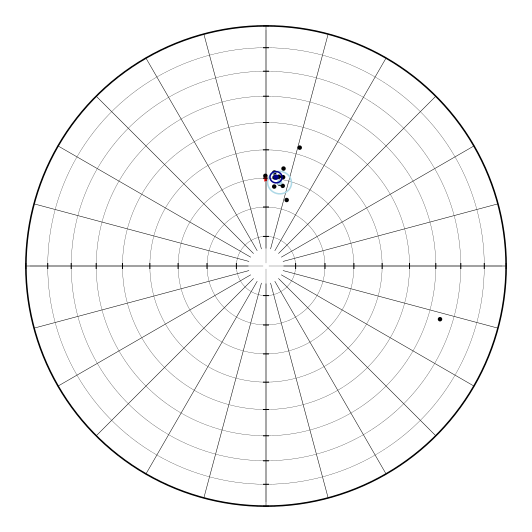

In [83]:
fig, ax = plt.subplots(num=1,figsize=[7.5,7.5])
#plt.figure(num=1,figsize=(8,8))
plot_net()
for n in range(len(data_acb)):
    #ipmag.plot_di_mean(data_acb['Dec'][n],data_acb['Inc'][n],data_acb['alpha'][n])
    ipmag.plot_di(data_acb_all['Dec'][n],data_acb_all['Inc'][n], color='k')
    
ipmag.plot_di_mean(distal_mean['dec'],distal_mean['inc'],distal_mean['alpha95'], color='lightblue')
ipmag.plot_di_mean(interior_mean['dec'],interior_mean['inc'], interior_mean['alpha95'], color='darkblue')
#ipmag.plot_di_mean(7.6,60.6,2.1, color = 'green', marker='^')
ipmag.plot_di_mean(0,60.4,0, color = 'red', marker ='*')

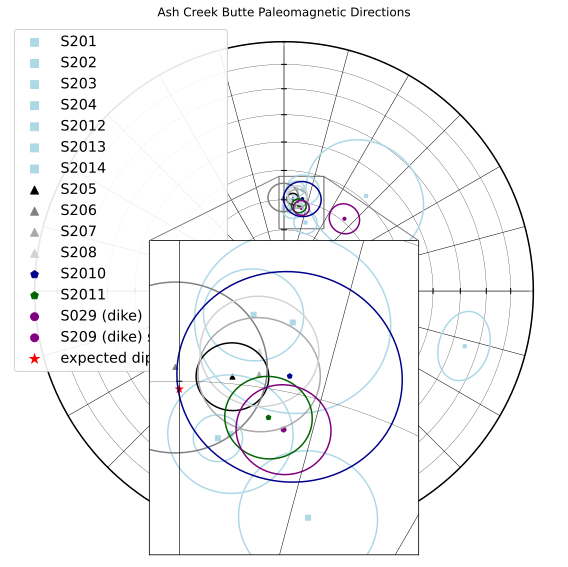

In [84]:
fig, ax = plt.subplots(num=1,figsize=(8,8)) # make the figure
#plt.figure(num=1,figsize=(8,8))
plot_net()

# plot the characteristic directions in black
ipmag.plot_di_mean(5.9,62.8,3.3, label = 'S201', color='lightblue',marker='s',markersize=10)
ipmag.plot_di_mean(17.4,66.5,3.7, label = 'S202', color='lightblue',marker='s',markersize=10)
ipmag.plot_di_mean(40.8,48.3,18.9, label = 'S203', color='lightblue',marker='s',markersize=10)
ipmag.plot_di_mean(107,25.2,9.7, label = 'S204', color='lightblue',marker='s',markersize=10)
ipmag.plot_di_mean(10.6,56.1,5.1, label = 'S2012', color='lightblue', marker='s', markersize=10)
ipmag.plot_di_mean(6.9,56,2.6, label = 'S2013', color='lightblue', marker='s', markersize=10)
ipmag.plot_di_mean(4.5,63.1,1.3, label = 'S2014', color='lightblue', marker='s', markersize=10)
#one stack
ipmag.plot_di_mean(5.5,59.6,1.9, label = 'S205', color='black', marker='^',markersize=10)
ipmag.plot_di_mean(359.6,59.2,4.8, label = 'S206', color='gray', marker ='^',markersize=10)
ipmag.plot_di_mean(8.2,59.3,3.2, label = 'S207', color='darkgray', marker='^',markersize=10)
ipmag.plot_di_mean(7.9,58,3.1, label = 'S208', color='lightgray', marker ='^',markersize=10)
#two stack
ipmag.plot_di_mean(11.3,59.1,5.9, label = 'S2010', color='darkblue', marker='p',markersize=10)
ipmag.plot_di_mean(9.9,61.6,2.3, label = 'S2011', color='darkgreen', marker='p',markersize=10)
#plot dike
ipmag.plot_di_mean(11.8,62.1,2.5, label= 'S029 (dike)', color='purple', marker='o', markersize=10)
ipmag.plot_di_mean(39.9,59,4.9, label= 'S209 (dike) secondary', color = 'purple', marker = 'o', markersize=10)

#plot dipole direction
ipmag.plot_di(dec=0,inc=60.44, label='expected dipole', color = 'red', marker='*', markersize=25)

plt.legend(loc=2,fontsize='x-large',framealpha=0.9,markerscale=2.5)

plt.title('Ash Creek Butte Paleomagnetic Directions')


# inset axes....
axins = zoomed_inset_axes(ax,6,loc=8,)
#axins.set_facecolor('white')

ipmag.plot_di(dec=0,inc=60.44, label='expected dipole', color = 'red', marker='*', markersize=100)
#the peripheral flows on sides of shield
ipmag.plot_di_mean(5.9,62.8,3.3, label = 'S201', color='lightblue',marker='s',markersize=25)
ipmag.plot_di_mean(17.4,66.5,3.7, label = 'S202', color='lightblue',marker='s',markersize=25)
ipmag.plot_di_mean(10.6,56.1,5.1, label = 'S2012', color='lightblue', marker='s', markersize=25)
ipmag.plot_di_mean(6.9,56,2.6, label = 'S2013', color='lightblue', marker='s', markersize=25)
ipmag.plot_di_mean(4.5,63.1,1.3, label = 'S2014', color='lightblue', marker='s', markersize=25)
#one stack
ipmag.plot_di_mean(5.5,59.6,1.9, label = 'S205', color='black', marker='^',markersize=25)
ipmag.plot_di_mean(359.6,59.2,4.8, label = 'S206', color='gray', marker ='^',markersize=25)
ipmag.plot_di_mean(8.2,59.3,3.2, label = 'S207', color='darkgray', marker='^',markersize=25)
ipmag.plot_di_mean(7.9,58,3.1, label = 'S208', color='lightgray', marker ='^',markersize=25)
#two stack
ipmag.plot_di_mean(11.3,59.1,5.9, label = 'S2010', color='darkblue', marker='p',markersize=25)
ipmag.plot_di_mean(9.9,61.6,2.3, label = 'S2011', color='darkgreen', marker='p',markersize=25)
#plot dike
ipmag.plot_di_mean(11.8,62.1,2.5, label= 'S209 (dike)', color='purple', marker='o', markersize=25)
ipmag.plot_di_mean(39.9,59,4.9, label= 'S209 (dike) secondary', color = 'purple', marker = 'o', markersize=25)

plt.setp(axins.get_yticklabels(), visible=False)
plt.setp(axins.get_xticklabels(), visible=False)
axins.yaxis.set_tick_params(size=0)
axins.xaxis.set_tick_params(size=0)

x1,x2,y1,y2 = -.02,0.16,0.25,0.46
axins.set_xlim(x1,x2)
axins.set_ylim(y1,y2)

axins = zoomed_inset_axes(ax,6,loc=8,)
#axins.set_facecolor('white')

plot_net()

plt.setp(axins.get_yticklabels(), visible=False)
plt.setp(axins.get_xticklabels(), visible=False)
axins.yaxis.set_tick_params(size=0)
axins.xaxis.set_tick_params(size=0)

x1,x2,y1,y2 = -.02,0.16,0.25,0.46
axins.set_xlim(x1,x2)
axins.set_ylim(y1,y2)


ax.indicate_inset_zoom(axins)
mark_inset(ax, axins, loc1=2, loc2=1, fc='none',ec='0.5')


fig.savefig('ACB_stereonet.svg')


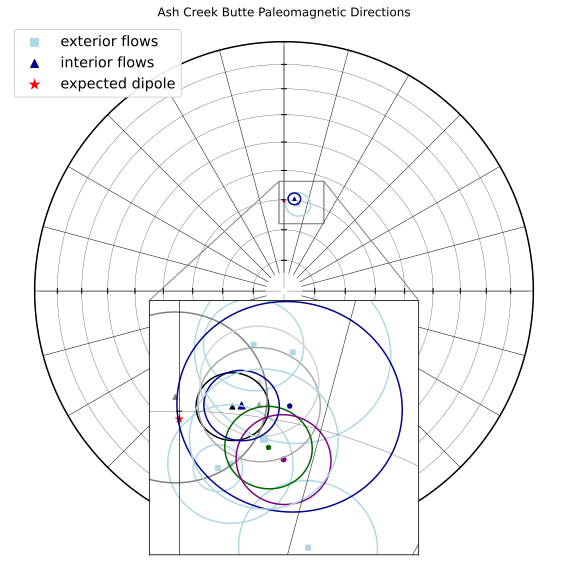

In [85]:
fig, ax = plt.subplots(num=1,figsize=(8,8)) # make the figure
#plt.figure(num=1,figsize=(8,8))
plot_net()

# plot the characteristic directions in black
ipmag.plot_di_mean(distal_mean['dec'],distal_mean['inc'],distal_mean['alpha95'], color='lightblue',marker='s',
                   label= 'exterior flows',markersize=10)
ipmag.plot_di_mean(interior_mean['dec'],interior_mean['inc'],interior_mean['alpha95'], color='darkblue', marker='^',markersize=10,
                  label= 'interior flows')
#ipmag.plot_di_mean(5.9,62.8,3.3, label = 'S201', color='lightblue',marker='s',markersize=10)
#ipmag.plot_di_mean(17.4,66.5,3.7, label = 'S202', color='lightblue',marker='s',markersize=10)
#ipmag.plot_di_mean(10.6,56.1,5.1, label = 'S2012', color='lightblue', marker='s', markersize=10)
#ipmag.plot_di_mean(6.9,56,2.6, label = 'S2013', color='lightblue', marker='s', markersize=10)
#ipmag.plot_di_mean(4.5,63.1,1.3, label = 'S2014', color='lightblue', marker='s', markersize=10)
#one stack
# ipmag.plot_di_mean(359.6,59.2,4.8, label = 'S206', color='gray', marker ='^',markersize=10)
# ipmag.plot_di_mean(5.5,59.6,1.9, label = 'S205', color='black', marker='^',markersize=10)
# ipmag.plot_di_mean(8.2,59.3,3.2, label = 'S207', color='darkgray', marker='^',markersize=10)
# ipmag.plot_di_mean(7.9,58,3.1, label = 'S208', color='lightgray', marker ='^',markersize=10)
# #two stack
# ipmag.plot_di_mean(11.3,59.1,5.9, label = 'S2010', color='darkblue', marker='p',markersize=10)
# ipmag.plot_di_mean(9.9,61.6,2.3, label = 'S2011', color='darkgreen', marker='p',markersize=10)
# #plot dike
# ipmag.plot_di_mean(11.8,62.1,2.5, label= 'S029 (dike)', color='purple', marker='o', markersize=10)


#plot dipole direction
ipmag.plot_di(dec=0,inc=60.44, label='expected dipole', color = 'red', marker='*', markersize=25)

plt.legend(loc=2,fontsize='x-large',framealpha=0.9,markerscale=2.5)

plt.title('Ash Creek Butte Paleomagnetic Directions')


# inset axes....
axins = zoomed_inset_axes(ax,6,loc=8,)
#axins.set_facecolor('white')

ipmag.plot_di(dec=0,inc=60.44, label='expected dipole', color = 'red', marker='*', markersize=100)
#the peripheral flows on sides of shield
ipmag.plot_di_mean(5.9,62.8,3.3, label = 'S201', color='lightblue',marker='s',markersize=25)
ipmag.plot_di_mean(17.4,66.5,3.7, label = 'S202', color='lightblue',marker='s',markersize=25)
ipmag.plot_di_mean(10.6,56.1,5.1, label = 'S2012', color='lightblue', marker='s', markersize=25)
ipmag.plot_di_mean(6.9,56,2.6, label = 'S2013', color='lightblue', marker='s', markersize=25)
ipmag.plot_di_mean(4.5,63.1,1.3, label = 'S2014', color='lightblue', marker='s', markersize=25)
#one stack
ipmag.plot_di_mean(5.5,59.6,1.9, label = 'S205', color='black', marker='^',markersize=25)
ipmag.plot_di_mean(359.6,59.2,4.8, label = 'S206', color='gray', marker ='^',markersize=25)
ipmag.plot_di_mean(8.2,59.3,3.2, label = 'S207', color='darkgray', marker='^',markersize=25)
ipmag.plot_di_mean(7.9,58,3.1, label = 'S208', color='lightgray', marker ='^',markersize=25)
#two stack
ipmag.plot_di_mean(11.3,59.1,5.9, label = 'S2010', color='darkblue', marker='p',markersize=25)
ipmag.plot_di_mean(9.9,61.6,2.3, label = 'S2011', color='darkgreen', marker='p',markersize=25)
#plot dike
ipmag.plot_di_mean(11.8,62.1,2.5, label= 'S209 (dike)', color='purple', marker='o', markersize=25)

ipmag.plot_di_mean(interior_mean['dec'],interior_mean['inc'],interior_mean['alpha95'], color='darkblue', marker='^',markersize=50,
                  label= 'interior flows')
ipmag.plot_di_mean(distal_mean['dec'],distal_mean['inc'],distal_mean['alpha95'], color='lightblue',marker='s',markersize=50
                  ,label= 'exterior flows')

plt.setp(axins.get_yticklabels(), visible=False)
plt.setp(axins.get_xticklabels(), visible=False)
axins.yaxis.set_tick_params(size=0)
axins.xaxis.set_tick_params(size=0)

x1,x2,y1,y2 = -.02,0.16,0.27,0.44
axins.set_xlim(x1,x2)
axins.set_ylim(y1,y2)

axins = zoomed_inset_axes(ax,6,loc=8,)
#axins.set_facecolor('white')

plot_net()

plt.setp(axins.get_yticklabels(), visible=False)
plt.setp(axins.get_xticklabels(), visible=False)
axins.yaxis.set_tick_params(size=0)
axins.xaxis.set_tick_params(size=0)

x1,x2,y1,y2 = -.02,0.16,0.27,0.44
axins.set_xlim(x1,x2)
axins.set_ylim(y1,y2)


ax.indicate_inset_zoom(axins)
mark_inset(ax, axins, loc1=2, loc2=1, fc='none',ec='0.5')


#fig.savefig('ACB_stereonet_2.svg')


In [86]:

acb_secvar_30 = []
#acb_secvar_120 = []
dummy_array_cuz_im_dumb = np.zeros(30)
year = 1990;

for n in range(len(dummy_array_cuz_im_dumb)):
    acb_field_wtime = ipmag.igrf([year,0,41.4,-122.0])
    #acb_secvar_120.append(acb_field_wtime[0:2])
    acb_secvar_30.append(acb_field_wtime[0:2])
    year = year + 1

In [87]:
#angular difference from 1900 to 2000 using cals10k
pmag.angle([19.3,65.6],[14.2,64.3])
#angular difference using igrf is the same, probably because the model is constrained to do so...


array([2.51941951])

In [88]:
acb_secvar_array = np.array(acb_secvar)
acb_secvar_120_array = np.array(acb_secvar_120)

NameError: name 'acb_secvar' is not defined

In [ ]:
igrf_rand_10 = acb_secvar_array[np.random.choice(acb_secvar_array.shape[0], 11, replace=False), :]

In [ ]:
igrf_rand_10[:,0]

In [ ]:
acb_secvar_120

In [ ]:
igrf_di = ipmag.make_di_block(dec=igrf_rand_10[:,0],inc=igrf_rand_10[:,1])
ipmag.fisher_mean(di_block=igrf_di)

In [ ]:
fig, ax = plt.subplots(num=3,figsize=[7.5,7.5])
#plt.figure(num=1,figsize=(8,8))
plot_net()


ipmag.plot_di(di_block=acb_secvar_120, color='darkblue',markersize=10)
ipmag.plot_di(di_block=acb_secvar_30, color='lightblue', markersize=10)

axins = zoomed_inset_axes(ax,6,loc=8,)

ipmag.plot_di(di_block=acb_secvar_120, color='darkblue',markersize=25,label='IGRF at ACB 1900-1990')
ipmag.plot_di(di_block=acb_secvar_30, color='lightblue',markersize=25,label='IGRF at ACB 1990-2020')
plt.legend(loc=2,fontsize='x-large',framealpha=0.9,markerscale=2.5)

#axins.set_facecolor('white')

plt.setp(axins.get_yticklabels(), visible=False)
plt.setp(axins.get_xticklabels(), visible=False)
axins.yaxis.set_tick_params(size=0)
axins.xaxis.set_tick_params(size=0)

x1,x2,y1,y2 = 0.03,0.12,0.20,0.35
axins.set_xlim(x1,x2)
axins.set_ylim(y1,y2)

axins = zoomed_inset_axes(ax,6,loc=8,)
#axins.set_facecolor('white')

plot_net()

plt.setp(axins.get_yticklabels(), visible=False)
plt.setp(axins.get_xticklabels(), visible=False)
axins.yaxis.set_tick_params(size=0)
axins.xaxis.set_tick_params(size=0)

x1,x2,y1,y2 = 0.03,0.12,0.20,0.35
axins.set_xlim(x1,x2)
axins.set_ylim(y1,y2)


ax.indicate_inset_zoom(axins)
mark_inset(ax, axins, loc1=2, loc2=1, fc='none',ec='0.5')

#fig.savefig('IGRF_stereonets.svg')

In [ ]:
def to_year_fraction(date):
    """authored by ninjagecko on stackoverflow:
    http://stackoverflow.com/questions/6451655/python-how-to-convert-datetime-dates-to-decimal-years
    """
    def sinceEpoch(date):  # returns seconds since epoch
        return time.mktime(date.timetuple())
    s = sinceEpoch

    year = date.year
    startOfThisYear = dt(year=year, month=1, day=1)
    startOfNextYear = dt(year=year+1, month=1, day=1)

    yearElapsed = s(date) - s(startOfThisYear)
    yearDuration = s(startOfNextYear) - s(startOfThisYear)
    fraction = yearElapsed/yearDuration

    return date.year + fraction


In [ ]:
date = to_year_fraction(dt(int(2020),int(9),int(24),int(1),int(1)))
print(date)

In [ ]:
ipmag.igrf_print(ipmag.igrf([date,0,41.43,-122.05]))

In [ ]:
date = to_year_fraction(dt(int(2020),int(10),int(13),int(1),int(1)))
print(date)

In [ ]:
ipmag.igrf_print(ipmag.igrf([date,0,44.39477,238.80553]))